#### **Import Necessary Libraries**


In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [376]:
plt.style.use("seaborn-v0_8-darkgrid")

#### **Load the Dataset**


In [377]:
data = pd.read_csv("Ice_cream_Selling_Data.csv")

In [378]:
data.head(5)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [379]:
data.shape

(50, 2)

#### **Plot the Data**


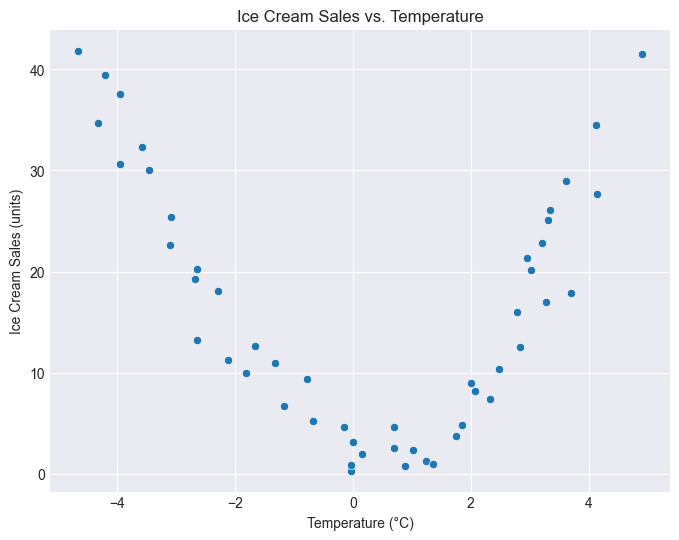

In [380]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature (°C)", y="Ice Cream Sales (units)", data=data)
plt.title("Ice Cream Sales vs. Temperature")
plt.show()

#### **Apply Polynomial Transformation**


In [381]:
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

In [382]:
X_poly = poly_transformer.fit_transform(data[["Temperature (°C)"]].values)

In [383]:
poly_data = pd.DataFrame(
    X_poly, columns=poly_transformer.get_feature_names_out(["Temperature (°C)"])
)
poly_data["Ice Cream Sales (units)"] = data["Ice Cream Sales (units)"]

In [384]:
poly_data.head(5)

,Temperature (°C),Temperature (°C)^2,Temperature (°C)^3,Ice Cream Sales (units)
0,-4.662263,21.736693,-101.342174,41.842986
1,-4.316559,18.632685,-80.429094,34.661120
2,-4.213985,17.757668,-74.830541,39.383001
3,-3.949661,15.599823,-61.614013,37.539845
4,-3.578554,12.806047,-45.827126,32.284531


#### **Define Features (X) and Target Variable (y)**


In [385]:
X = poly_data.drop("Ice Cream Sales (units)", axis=1).values
y = poly_data["Ice Cream Sales (units)"].values.reshape(-1, 1)

#### **Train the Polynomial Regression Model**


In [386]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X, y)

LinearRegression()

#### **Make Predictions and Evaluate the Model**


In [387]:
y_pred_poly = lin_reg_poly.predict(X)

In [388]:
r2 = r2_score(y, y_pred_poly)
print(f"R² for Polynomial Regression: {r2:.6f}")

R² for Polynomial Regression: 0.936973


#### **Plot the Polynomial Regression Results**


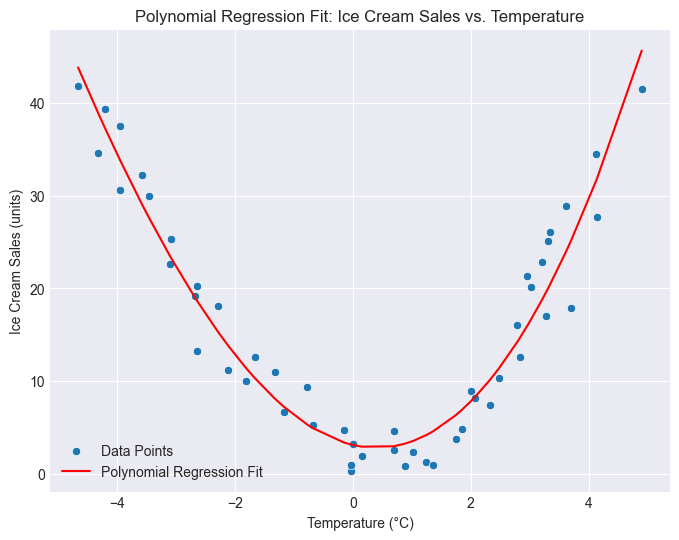

In [389]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Temperature (°C)", y="Ice Cream Sales (units)", data=data, label="Data Points"
)
sns.lineplot(
    x=data["Temperature (°C)"],
    y=y_pred_poly.ravel(),
    color="r",
    label="Polynomial Regression Fit",
)

plt.title("Polynomial Regression Fit: Ice Cream Sales vs. Temperature")
plt.legend()
plt.show()